## Criterio 3 Clúster

Nivel 4 (destacado) 
- Los comentarios sobre los resultados de los grupos son pertinentes.
- El informe sobre los clúster esta muy bien hecho.


### Importando Librerias

In [6]:
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Scikit-learn
from sklearn.tree import plot_tree
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

### Lectura de archivo pre-procesado (sin nulos)

In [37]:
# Lectura de datos (sin nulos)
df_base_pre_processed = pd.read_csv("CTG_PREPROCESS.csv")
df_base_pre_processed.head(5)

,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,Variab10.txt,12/1/1996,CTG0001.txt,240.0,357.0,120.0,120.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
1,Fmcs_1.txt,5/3/1996,CTG0002.txt,5.0,632.0,132.0,132.0,4.0,0.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
2,Fmcs_1.txt,5/3/1996,CTG0003.txt,177.0,779.0,133.0,133.0,2.0,0.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,Fmcs_1.txt,5/3/1996,CTG0004.txt,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,Fmcs_1.txt,5/3/1996,CTG0005.txt,533.0,1147.0,132.0,132.0,4.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
5,Fmcs_2.txt,5/3/1996,CTG0006.txt,0.0,953.0,134.0,134.0,1.0,0.0,10.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8.0,3.0
6,Fmcs_2.txt,5/3/1996,CTG0007.txt,240.0,953.0,134.0,134.0,1.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8.0,3.0
7,Hasc_1.txt,2/22/1995,CTG0008.txt,62.0,679.0,122.0,122.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,3.0
8,Hasc_1.txt,2/22/1995,CTG0009.txt,120.0,779.0,122.0,122.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,3.0
9,Hasc_1.txt,2/22/1995,CTG0010.txt,181.0,1192.0,122.0,122.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,3.0


### Graficando datos iniciales

<Axes: xlabel='LB', ylabel='AC'>

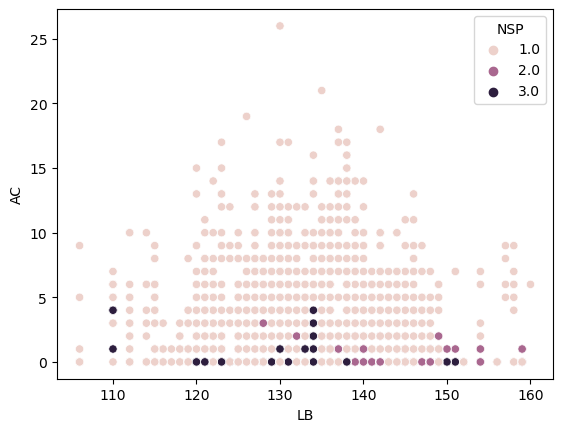

In [8]:
# Visualizando los datos
sns.scatterplot(data=df_base_pre_processed, x='LB', y='AC', hue='NSP')

### Entrenando el modelo

In [9]:
semilla_aleatoria=0
df_base_cluster=df_base_pre_processed.copy()
X = df_base_cluster[['AC','LB']]
y = df_base_cluster[['NSP']]
# In the first step we will split the data in training and remaining dataset
# En el primer paso separamos la data en entrenamiento y pruebas, un 33% para entrenamiento y 67% para pruebas
train_x,test_x,train_y,test_y = train_test_split(X,y, train_size=0.33, random_state=semilla_aleatoria)
print(y)

      NSP
0     2.0
1     1.0
2     1.0
3     1.0
4     1.0
...   ...
2121  2.0
2122  2.0
2123  2.0
2124  2.0
2125  1.0

[2126 rows x 1 columns]


#### Normalizando y evaluando el modelo

In [10]:
X_train_norm = preprocessing.normalize(train_x)
X_test_norm = preprocessing.normalize(test_x)
#Fitting and Evaluating the Model
kmeans = KMeans(n_clusters=3, random_state=semilla_aleatoria, n_init='auto')
kmeans.fit(X_train_norm)

KMeans(n_clusters=3, n_init='auto', random_state=0)

### Graficando agrupamiento

<Axes: xlabel='LB', ylabel='AC'>

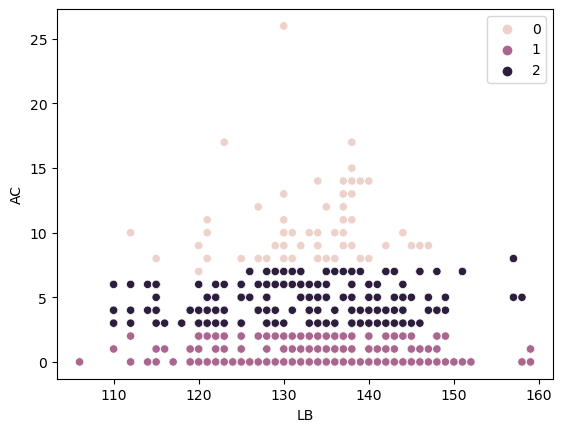

In [11]:
# Visualizando los datos
sns.scatterplot(data=train_x, x='LB', y='AC', hue=kmeans.labels_)

### Realizando evaluacion del modelo entrenado con las siguientes metricas

In [12]:
print("Homogeneity: {0:0.3f}".format(metrics.homogeneity_score(train_y['NSP'], kmeans.labels_)))
print("Completeness: {0:0.3f}".format(metrics.completeness_score(train_y['NSP'], kmeans.labels_)))
print("V_measure: {0:0.3f}".format(metrics.v_measure_score(train_y['NSP'], kmeans.labels_)))
print("Adjusted random: {0:0.3f}".format(metrics.adjusted_rand_score(train_y['NSP'], kmeans.labels_))) 
print("Adjusted mutual info: {0:0.3f}".format(metrics.adjusted_mutual_info_score(train_y['NSP'], kmeans.labels_))) 
print("Silhouette: {0:0.3f}".format(metrics.silhouette_score(train_x, kmeans.labels_, metric='euclidean', sample_size=300))) 

Homogeneity: 0.146
Completeness: 0.111
V_measure: 0.126
Adjusted random: -0.105
Adjusted mutual info: 0.123
Silhouette: 0.066


<Axes: ylabel='NSP'>

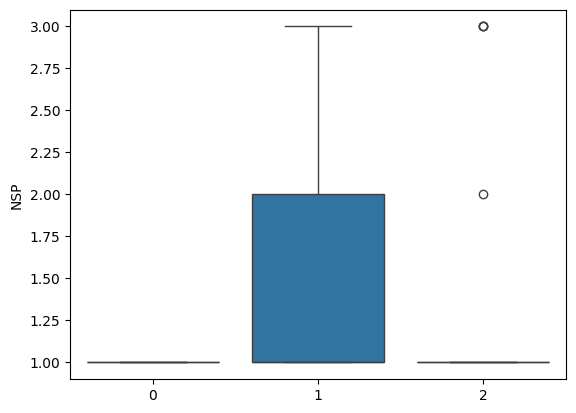

In [38]:
sns.boxplot(x = kmeans.labels_, y = train_y['NSP'])

In [50]:
df_base_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 40 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   FileName  2126 non-null   object 
 1   Date      2126 non-null   object 
 2   SegFile   2126 non-null   object 
 3   b         2126 non-null   float64
 4   e         2126 non-null   float64
 5   LBE       2126 non-null   float64
 6   LB        2126 non-null   float64
 7   AC        2126 non-null   float64
 8   FM        2126 non-null   float64
 9   UC        2126 non-null   float64
 10  ASTV      2126 non-null   float64
 11  MSTV      2126 non-null   float64
 12  ALTV      2126 non-null   float64
 13  MLTV      2126 non-null   float64
 14  DL        2126 non-null   float64
 15  DS        2126 non-null   float64
 16  DP        2126 non-null   float64
 17  DR        2126 non-null   float64
 18  Width     2126 non-null   float64
 19  Min       2126 non-null   float64
 20  Max       2126 non-null   floa

El método del codo es una de las formas más populares de encontrar el número óptimo de grupos. Este método utiliza el concepto de valor WCSS. WCSS significa Suma de cuadrados dentro del grupo , que define las variaciones totales dentro de un grupo.

/Users/davidcanaca/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


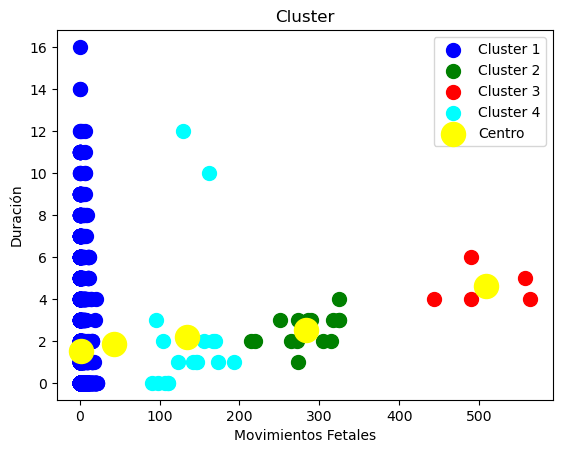

In [85]:

# Columnas 'b' y 'e' para el clustering
x2 = df_base_cluster[['FM', 'DL']].values  

# Entrenando el modelo K-means con el número óptimo de clusters
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)  
y_predict = kmeans.fit_predict(x2)  

# Visualizando los clusters
plt.scatter(x2[y_predict == 0, 0], x2[y_predict == 0, 1], s=100, c='blue', label='Cluster 1')  
plt.scatter(x2[y_predict == 1, 0], x2[y_predict == 1, 1], s=100, c='green', label='Cluster 2')  
plt.scatter(x2[y_predict == 2, 0], x2[y_predict == 2, 1], s=100, c='red', label='Cluster 3')  
plt.scatter(x2[y_predict == 3, 0], x2[y_predict == 3, 1], s=100, c='cyan', label='Cluster 4')  
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centro')   
plt.title('Cluster')  
plt.xlabel('Movimientos Fetales')  
plt.ylabel('Duración')  
plt.legend()  
plt.show()  

